<a href="https://colab.research.google.com/github/deep-dive-coding-data-science/Prework/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Step 2

Load data and examine.

In [0]:
train = pd.read_csv('/content/drive/My Drive/Deep Dive Data Science - Cohort 1/Project 1/Data/Train.csv')
train0 = train[ train['target']==0 ].copy()
train1 = train[ train['target']==1 ].copy()
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# Step 3
Examine the data.

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


Calculate means and standard deviations.

In [0]:
s = [0]*200
m = [0]*200
for i in range(200):
    s[i] = np.std(train['var_'+str(i)])
    m[i] = np.mean(train['var_'+str(i)])

In [0]:
trainVars = train.copy()
trainVars = trainVars.drop('ID_code',1)
trainVars = trainVars.drop('target',1)

trainVars.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
import seaborn as sns

# trainVars.iloc[0:10].hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [0]:
trainOuts = train['target']
trainOuts.head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64>

In [0]:
c = trainVars.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

In [0]:
so_mixed = so[so<1]
print(so_mixed[1:10])

var_26   var_139    0.009844
var_148  var_53     0.009788
var_53   var_148    0.009788
var_165  var_81     0.009714
var_81   var_165    0.009714
         var_174    0.009490
var_174  var_81     0.009490
var_189  var_183    0.009359
var_183  var_189    0.009359
dtype: float64


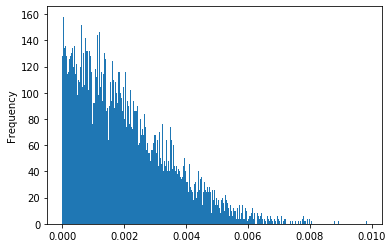

In [0]:
so_mixed.plot(kind='hist', bins=1000)

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
# define the model
model = GaussianNB()

In [0]:
model.fit(trainVars, trainOuts)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
Xsample = trainVars.iloc[:,0]
ysample = trainOuts[0]
Xsample.head()
print(ysample)

0


In [0]:
yhat_prob = model.predict_proba(trainVars)
print(yhat_prob)

[[0.98851572 0.01148428]
 [0.21505871 0.78494129]
 [0.99276324 0.00723676]
 ...
 [0.94513288 0.05486712]
 [0.9444707  0.0555293 ]
 [0.99776518 0.00223482]]


In [0]:
from sklearn import metrics

yhat_class = model.predict(trainVars)

print(metrics.classification_report(yhat_class, trainOuts))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96    189678
           1       0.37      0.71      0.49     10322

    accuracy                           0.92    200000
   macro avg       0.68      0.82      0.72    200000
weighted avg       0.95      0.92      0.93    200000



In [0]:
print(metrics.confusion_matrix(yhat_class, trainOuts, labels=[1, 0]))

[[  7380   2942]
 [ 12718 176960]]


In [0]:
import sklearn.model_selection as model_selection
from sklearn import metrics

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(trainVars, trainOuts, train_size=0.75,test_size=0.25)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print("X_test: ", X_test)
#print ("y_test: ", y_test)

In [0]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9217


In [0]:
train1.shape

(20098, 202)

In [0]:
train0.shape

(179902, 202)

In [0]:
(179902/20098)

8.951238929246692

In [0]:
numInnerLoop = 1
test_sizes_list = np.arange(0.95, 0.99, 0.005)
y_acc_mean = np.zeros(len(test_sizes_list))
y_acc_mean_train = np.zeros(len(test_sizes_list))
for idx2, test_size_curr in enumerate(test_sizes_list):
  y_acc = np.zeros(numInnerLoop)
  y_cohen = np.zeros(numInnerLoop)
  y_acc_train = np.zeros(numInnerLoop)
  for idx in range(numInnerLoop):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(trainVars, trainOuts, test_size=test_size_curr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_acc[idx] = metrics.accuracy_score(y_test, y_pred)
    y_pred_train = model.predict(X_train)
    y_acc_train[idx] = metrics.accuracy_score(y_train, y_pred_train)
    #y_cohen[idx] = metrics.cohen_kappa_score(y_test, y_pred)
    #print(y_cohen[idx])
  y_acc_mean[idx2] = np.mean(y_acc)
  y_acc_mean_train[idx2] = np.mean(y_acc_train)
#  print(y_acc_mean[idx2])

print(y_acc_mean)
print(y_acc_mean_train)



0.40886712348209286
0.4208455083431327
0.40188194570031543
0.39771210139957236
0.4035487471494521
0.3881503346912166
0.3809683478732967
0.34903574206125576
0.3543135467260189
[0.91753158 0.91853403 0.91626562 0.91681347 0.91642784 0.91561026
 0.91414796 0.91227919 0.9095404 ]
[0.9282     0.92744444 0.92675    0.93128571 0.93133333 0.9304
 0.932      0.941      0.9385    ]


In [0]:
test_size_curr


0.9510000000000001

In [0]:
y_pred.sum()

9591

#### Undersampling of the training data set to make the occurrence of target=1 and target=0 equal.

In [0]:
trainSubset = train.drop(train.query('target == 0').sample(frac=8/9).index)
print(trainSubset.shape)

(40087, 202)


#### Create two new dataframes: one with only the variables and the other containing just the target column.

In [0]:
trainSubVars = trainSubset.copy()
del trainSubVars['ID_code']
del trainSubVars['target']

trainSubTarget = trainSubset['target']

#### Loop over sizes of the test set fraction and average the accuracy each times over "numInnerLoop" iterations.

In [0]:
numInnerLoop = 50
test_sizes_list = np.arange(0.1, 0.99, 0.02)
y_acc_mean = np.zeros(len(test_sizes_list))
y_acc_mean_train = np.zeros(len(test_sizes_list))
for idx2, test_size_curr in enumerate(test_sizes_list):
  y_acc = np.zeros(numInnerLoop)
  y_acc_train = np.zeros(numInnerLoop)
  for idx in range(numInnerLoop):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(trainSubVars, trainSubTarget, test_size=test_size_curr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_acc[idx] = metrics.accuracy_score(y_test, y_pred)
    y_pred_train = model.predict(X_train)
    y_acc_train[idx] = metrics.accuracy_score(y_train, y_pred_train)
    #print(y_acc[idx])
  y_acc_mean[idx2] = np.mean(y_acc)
  y_acc_mean_train[idx2] = np.mean(y_acc_train)
  #print(y_acc_mean[idx2])

print(y_acc_mean)
print(y_acc_mean_train)

[0.80865054 0.80757431 0.80731516 0.80903336 0.80784645 0.80829384
 0.80812472 0.80821952 0.80836419 0.80827082 0.80778083 0.80789055
 0.80746001 0.80725887 0.80743469 0.80730776 0.80703807 0.80688134
 0.80706361 0.80751793 0.80630812 0.80676389 0.80663371 0.80624972
 0.80599028 0.80592026 0.80621469 0.80558232 0.80506539 0.80525752
 0.8047468  0.80483803 0.80407349 0.80380412 0.8031649  0.80276395
 0.80203212 0.80100909 0.80013691 0.79860249 0.79627096 0.79367371
 0.78946447 0.78090219 0.75918597]
[0.81104773 0.8113023  0.81122759 0.81112702 0.81118311 0.81124949
 0.81130841 0.81132082 0.81126483 0.81115238 0.81148753 0.81141641
 0.81164456 0.81152914 0.81171046 0.81156411 0.81200258 0.81218015
 0.81195325 0.81169585 0.81262985 0.81216673 0.81240781 0.8124708
 0.8132977  0.8132481  0.81255038 0.81328252 0.81367819 0.81363062
 0.81460003 0.8140449  0.8156707  0.81512266 0.81555278 0.81657478
 0.8173167  0.81872447 0.81897719 0.81981289 0.82269461 0.82479726
 0.83073597 0.8404242  0.865

#### Plot the performance on the test set (which is hidden from the model training) and the training set (used to train the model).

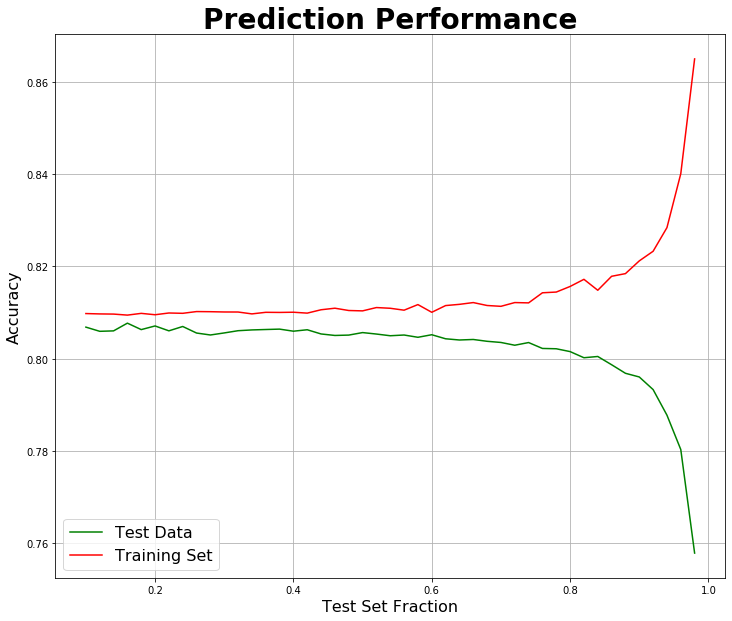

In [0]:
plt.figure(figsize=(12,10));
plt.plot(test_sizes_list,y_acc_mean, color='green', label='Test Data');
plt.plot(test_sizes_list,y_acc_mean_train, color='red', label='Training Set');
plt.legend(loc='lower left', fontsize=16);
plt.title("Prediction Performance", fontsize=28, fontweight='bold');
plt.xlabel('Test Set Fraction', fontsize=16);
plt.ylabel('Accuracy', fontsize=16);
plt.grid(b=True)

# Predicting outcomes on a blind test data set.

1) Load the 'Test.csv' data set.

In [0]:
testSet = pd.read_csv('/content/drive/My Drive/Deep Dive Data Science - Cohort 1/Project 1/Data/Test.csv')
del testSet['ID_code']

2) Train the model on your training data set.

In [0]:
model.fit(X_train, y_train)
testSet_pred = model.predict(testSet)

3) Read in the submission template file 'sample_submission.csv'

In [0]:
submissionDF = pd.read_csv('/content/drive/My Drive/Deep Dive Data Science - Cohort 1/Project 1/Data/sample_submission.csv')

submissionDF.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


4) Write your predictions to the submission file in the 'target' column and write the resulting dataframe to a CSV file.

In [0]:
submissionDF['target'] = testSet_pred
submissionDF.to_csv('/content/drive/My Drive/Deep Dive Data Science - Cohort 1/Project 1/Data/submission.csv',index=False)